# Code for Experiment 2 - Measuring Impedance

In [1]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np

## Data Analysis

### Impedance and phase shift for an inductor

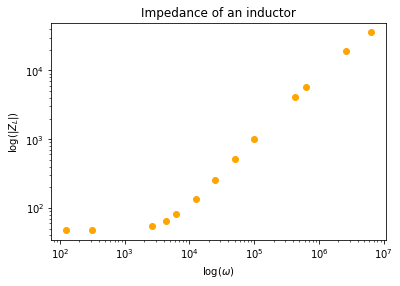

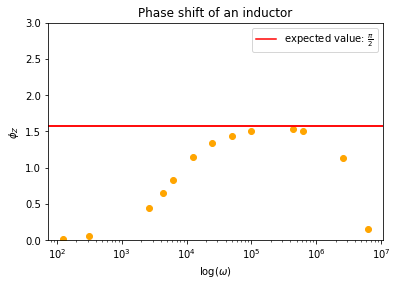

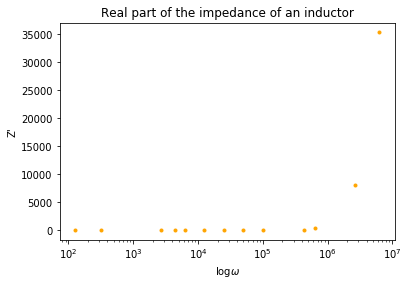

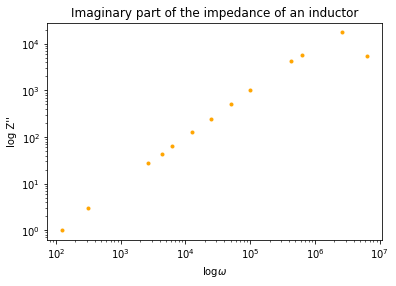

In [20]:
# complex unit
i = 1j

# Data - Inductor
f_values = [1000, 2000, 4000, 8000, 16000, 20, 50, 690, 420, 1e6, 100e3, 420e3, 69e3]  # frequency in Hz
R = 10  # resistance in ohm
U_0_values = [3.5, 4.2, 4.7, 4.9, 5.0, 2.73, 2.74, 3.19, 2.94, 5.00, 5.00, 5.02, 5.01]  # voltage over inductor and resistor in V
V_0_values = [4e-1, 3e-1, 1.84e-1, 0.96e-1, 0.49e-1, 474e-3, 473.5e-3, 437e-3, 459e-3, 1.4e-3, 8.8e-3, 2.6e-3, 12e-3]  # voltage over resistor in V
T = [1, 0.5, 0.25, 0.125, 0.0625, 50, 20, 1.46, 2.39, 1e-3, 10e-3, 2.38e-3, 14.5e-3]  # period in ms
T = [element * 10 ** -3 for element in T]  # convert to s
peak_U_values = [252, 125, 62.5, 31.5, 15.6]  # peak position in µs
peak_V_values = [384, 216, 116, 60, 30.6]  # peak position in µs
peak_U_values = [element * 10 ** -6 for element in peak_U_values]  # convert to s
peak_V_values = [element * 10 ** -6 for element in peak_V_values]  # convert to s

# Calculate phase from peak measurements
phi_U_values = [-peak / T * 2 * np.pi for peak, T in zip(peak_U_values, T)]
phi_V_values = [-peak / T * 2 * np.pi for peak, T in zip(peak_V_values, T)]
phi_Z_measured = [1, 3, 37, 25, 9, 86, 65, 88] # in °
phi_Z_measured = [phi_Z * np.pi /180 for phi_Z in phi_Z_measured] # convert to radians

# Calculate circular velocity
omega = [2 * np.pi * f for f in f_values]


# Function for calculating phase difference
def calculatePhaseDifferences(phi_U_values, phi_V_values):
    phi_Z_values = [phi_U - phi_V for phi_U, phi_V in zip(phi_U_values, phi_V_values)]
    return phi_Z_values


# Function for calculating impedance
def calculateImpedance(U_0, V_0, phi_Z):
    Z_hat = (U_0 / V_0 * np.exp(i * phi_Z) - 1) * R
    return Z_hat


# Calculate impedance of the inductor
phi_Z_values = calculatePhaseDifferences(phi_U_values, phi_V_values) + phi_Z_measured
Z_hat = [calculateImpedance(U_0, V_0, phi_Z) for U_0, V_0, phi_Z in zip(U_0_values, V_0_values, phi_Z_values)]
Z_hat_mod = [np.abs(z) for z in Z_hat]    # get modulus of Z_hat
Z_hat_real = [z.real for z in Z_hat]      # get real part of Z_hat
Z_hat_im = [z.imag for z in Z_hat]        # get imaginary part of Z_hat

# Plot
Z_plot = plt.figure(1)
plt.loglog(omega, Z_hat_mod, 'o', color='orange')
plt.title('Impedance of an inductor')
plt.xlabel(r'$\log(\omega)$')
plt.ylabel(r'$\log\left(|Z_L|\right)$')

phi_Z_plot = plt.figure(2)
plt.semilogx(omega, phi_Z_values, 'o', color='orange')
plt.axhline(y = np.pi/2, color = 'r', linestyle = '-')
plt.title('Phase shift of an inductor')
plt.xlabel(r'$\log(\omega)$')
plt.ylabel(r'$\phi_Z$')
plt.axhline(y = np.pi/2, color = 'r', linestyle = '-', label=r'expected value: $\frac{\pi}{2}$')
plt.legend(loc='upper right')
plt.ylim([0, 3])

Z_real_plot = plt.figure(3)
plt.semilogx(omega, Z_hat_real, '.', color='orange')
plt.title('Real part of the impedance of an inductor')
plt.xlabel(r'$\log{\omega}$')
plt.ylabel('Z\'')

Z_im_plot = plt.figure(4)
plt.loglog(omega, Z_hat_im, '.', color='orange')
plt.title('Imaginary part of the impedance of an inductor')
plt.xlabel(r'$\log{\omega}$')
plt.ylabel('log Z\'\'')

plt.show()


### Impedance and phase shift of a capacitor

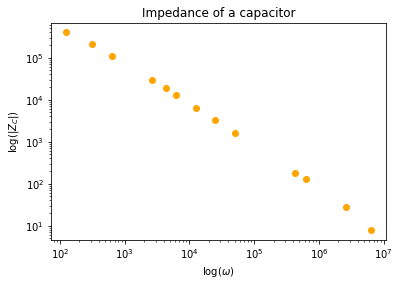

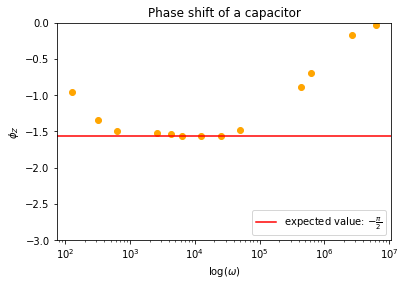

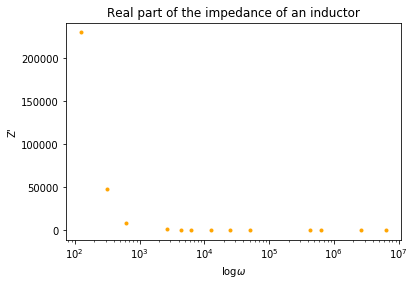

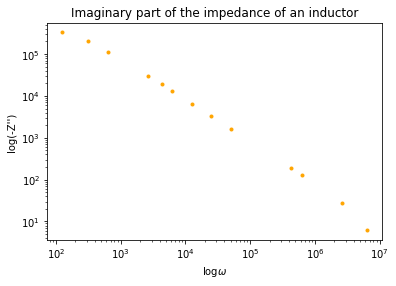

In [25]:
# complex unit
i = 1j

# Data - Capacitor
f_values = [1e3, 2e3, 4e3, 8e3, 100, 20, 50, 690, 420, 1e6, 100e3, 420e3, 69e3] # frequency in Hz
R = 150           # resistance in ohm
U_0_values = [5.0, 5.0, 5.0, 5.0, 5.00, 5.08, 5.06, 5.05, 5.03, 3.79, 4.15, 3.81, 4.36]                    # voltage over inductor and resistor in V
V_0_values = [0.58e-1, 1.15e-1, 2.30e-1, 4.57e-1, 6.73e-3, 1.90e-3, 3.53e-3, 39.8e-3, 25.0e-3, 3.67, 3.13, 3.65, 2.75] # voltage over resistor in V
T = [1, 0.5, 0.25, 0.125, 10, 50, 20, 1.46, 2.38, 1e-3, 10e-3, 2.39e-3, 14.5e-3]       # period in ms
T = [element * 10**-3 for element in T] # convert to s
peak_U_values = [250, 125, 62, 31.5] # peak position in µs
peak_V_values = [0, 0, 0, 2]    # peak position in µs
peak_U_values = [element * 10**-6 for element in peak_U_values] # convert to s
peak_V_values = [element * 10**-6 for element in peak_V_values] # convert to s

# Calculate phase from peak measurements
phi_U_values = [-peak / T * 2 * np.pi for peak, T in zip(peak_U_values, T)]
phi_V_values = [-peak / T * 2 * np.pi for peak, T in zip(peak_V_values, T)]
phi_Z_measured = [-86, -55, -77, -88, -87, -2.3, -40, -10, -51] # in °
phi_Z_measured = [phi_Z * np.pi /180 for phi_Z in phi_Z_measured] # convert to radians

# Calculate circular velocity
omega = [2 * np.pi * f for f in f_values]


# Function for calculating phase difference
def calculatePhaseDifferences(phi_U_values, phi_V_values):
    phi_Z_values = [phi_U - phi_V for phi_U, phi_V in zip(phi_U_values, phi_V_values)]
    return phi_Z_values


# Function for calculating impedance
def calculateImpedance(U_0, V_0, phi_Z):
    Z_hat = (U_0 / V_0 * np.exp(i * phi_Z) - 1) * R
    return Z_hat


# Calculate impedance of the inductor
phi_Z_values = calculatePhaseDifferences(phi_U_values, phi_V_values) + phi_Z_measured
Z_hat = [calculateImpedance(U_0, V_0, phi_Z) for U_0, V_0, phi_Z in zip(U_0_values, V_0_values, phi_Z_values)]
Z_hat_mod = [np.abs(z) for z in Z_hat]    # get modulus of Z_hat
Z_hat_real = [z.real for z in Z_hat]      # get real part of Z_hat
Z_hat_im = [-z.imag for z in Z_hat]        # get imaginary part of Z_hat

# Plot
Z_plot = plt.figure(1)
plt.loglog(omega, Z_hat_mod, 'o', color='orange')
plt.title('Impedance of a capacitor')
plt.xlabel(r'$\log(\omega)$')
plt.ylabel(r'$\log\left(|Z_C|\right)$')

phi_Z_plot = plt.figure(2)
plt.semilogx(omega, phi_Z_values, 'o', color='orange')
plt.title('Phase shift of a capacitor')
plt.xlabel(r'$\log(\omega)$')
plt.ylabel(r'$\phi_Z$')
plt.axhline(y = -np.pi/2, color = 'r', linestyle = '-', label=r'expected value: $-\frac{\pi}{2}$')
plt.ylim([-3, 0])
plt.legend(loc='lower right')

Z_real_plot = plt.figure(3)
plt.semilogx(omega, Z_hat_real, '.', color='orange')
plt.title('Real part of the impedance of an inductor')
plt.xlabel(r'$\log{\omega}$')
plt.ylabel('Z\'')

Z_im_plot = plt.figure(4)
plt.loglog(omega, Z_hat_im, '.', color='orange')
plt.title('Imaginary part of the impedance of an inductor')
plt.xlabel(r'$\log{\omega}$')
plt.ylabel('log(-Z\'\')')

plt.show()
